In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

In [2]:
clusters = ['EPITELIO', 'LINFOCITO B', 'LINFOCITO T', 'FIBROBLASTO', 'MACROFAGO-MONOCITO']

Coincidencias: {'KRT8', 'SLPI', 'WFDC2', 'MUC5B', 'TFF3', 'KRT18'}
Elementos exclusivos de HPV16-EPITELIO: {'IGHV3-15', 'IGLL5', 'KRT19', 'SLC34A2', 'IGLC2', 'IGHV3-30', 'IGLV1-51', 'SSR4', 'IGHV3-7', 'IGKV2-30', 'EPCAM', 'KRT20', 'APOC1', 'LCN2', 'CLDN3', 'LTF', 'IGHV4-59', 'PDZK1IP1', 'CLDN4', 'IGLV3-19', 'SPINT2', 'TCN1', 'IGKV1-16', 'CLU', 'GDF15', 'SAA1', 'ELF3', 'IGHA1', 'JCHAIN', 'MZB1', 'SST'}
Elementos exclusivos de HPV18-EPITELIO: {'HSP90AA1', 'CCDC146', 'PIGR', 'MS4A8', 'C11orf88', 'AGR2', 'MAPK15', 'ODF3B', 'HYDIN', 'DNAH12', 'BPIFB1', 'SCGB2A1', 'CAPS', 'RSPH1'}


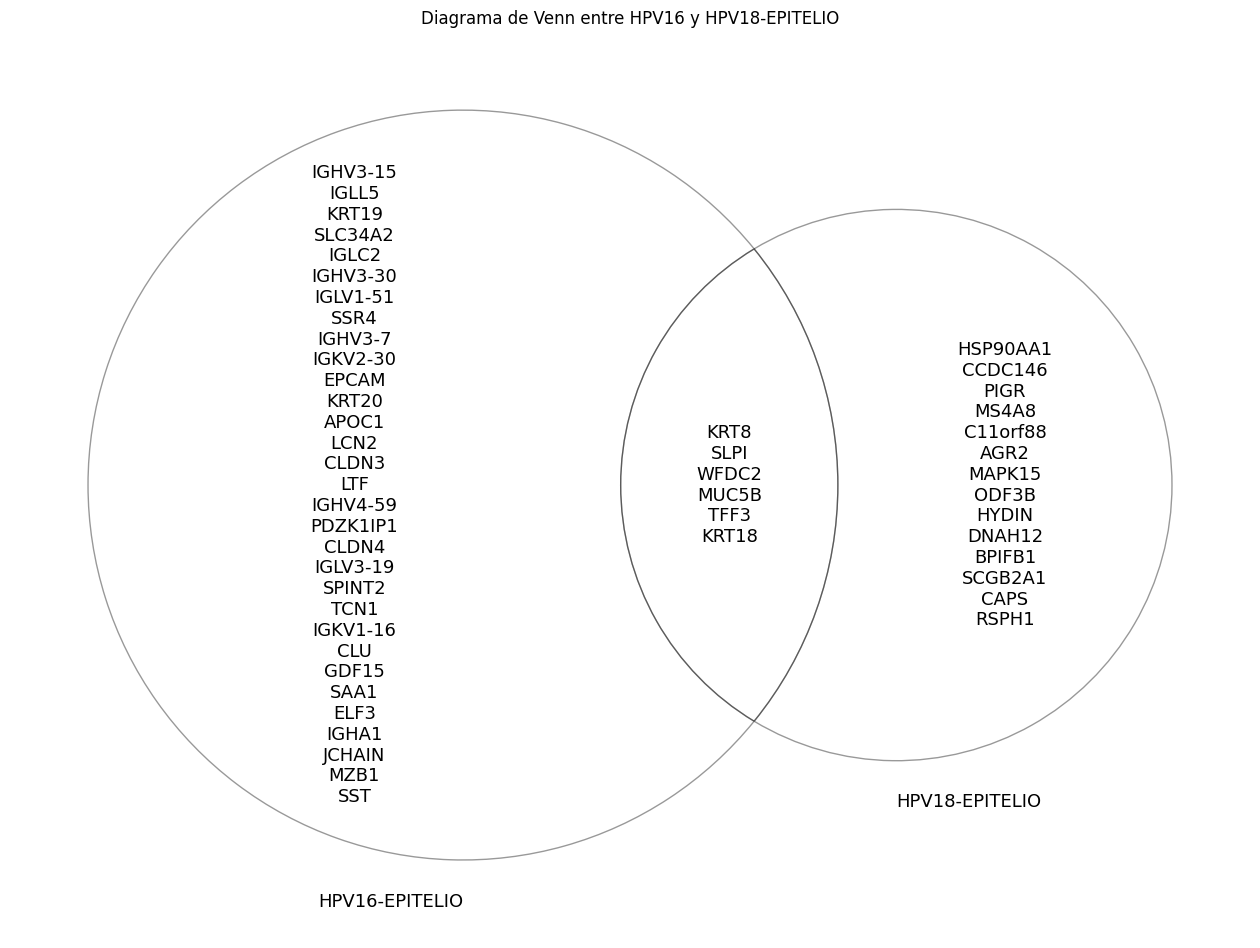

Coincidencias: {'FKBP11', 'SEC11C', 'DERL3', 'JCHAIN', 'HERPUD1', 'MZB1', 'CD79A', 'SSR4'}
Elementos exclusivos de HPV16-EPITELIO: {'XBP1', 'CD38'}
Elementos exclusivos de HPV18-EPITELIO: {'PRDX4', 'PIM2'}


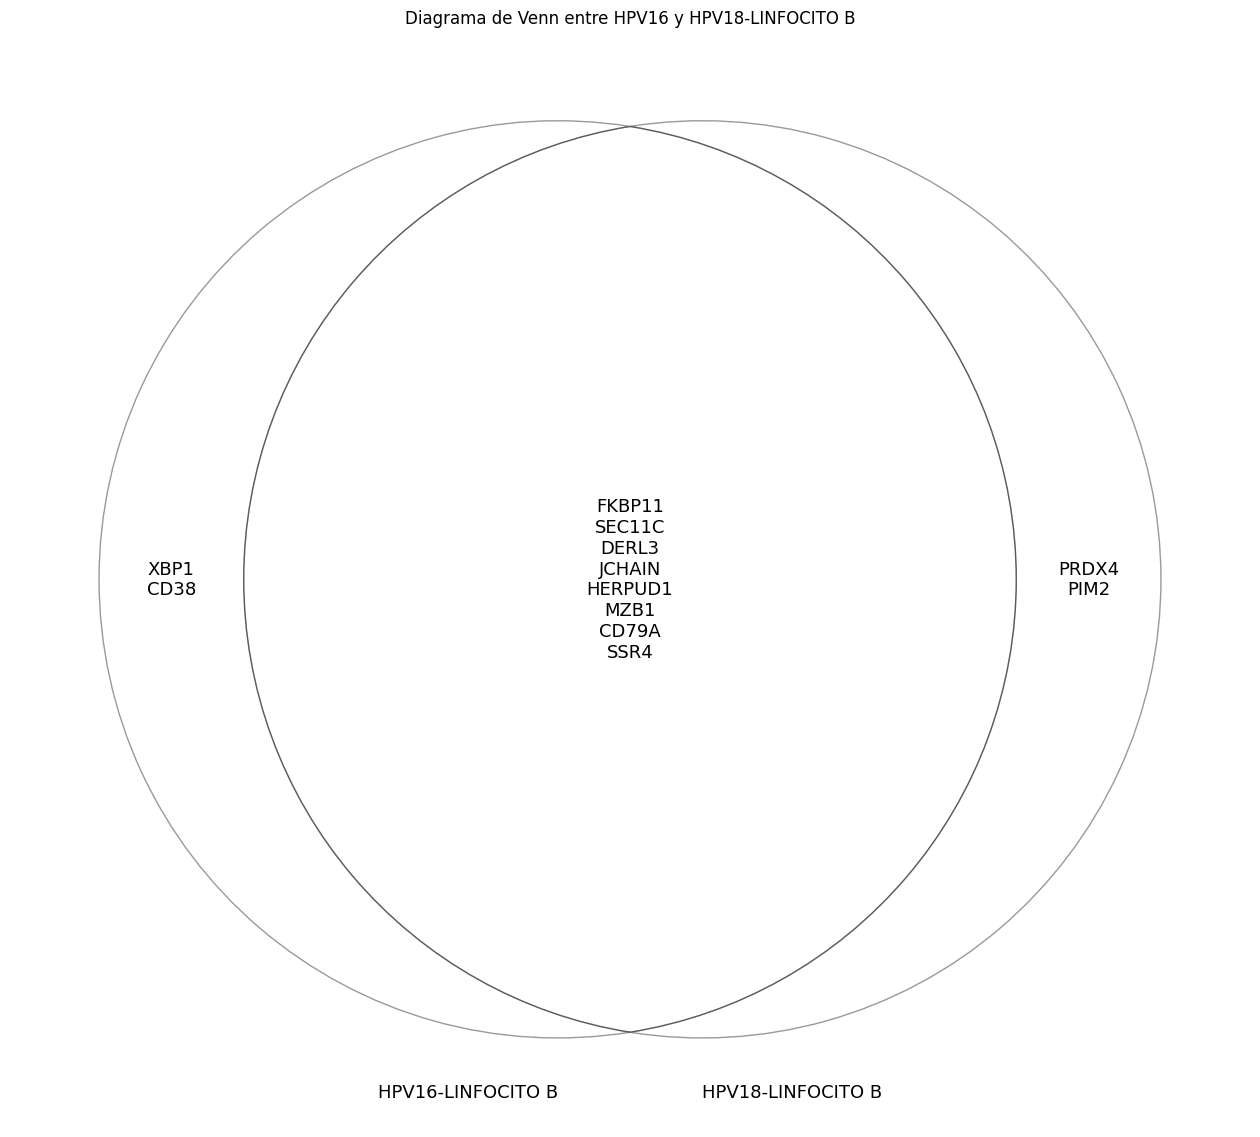

Coincidencias: {'HLA-E', 'CD3E', 'HLA-B', 'B2M'}
Elementos exclusivos de HPV16-EPITELIO: {'SARAF', 'CXCR4', 'TNFAIP3', 'CD3D', 'BTG1', 'CD2'}
Elementos exclusivos de HPV18-EPITELIO: {'IL32', 'HLA-C', 'PTPRCAP', 'HLA-A', 'PTPRC', 'ARHGDIB'}


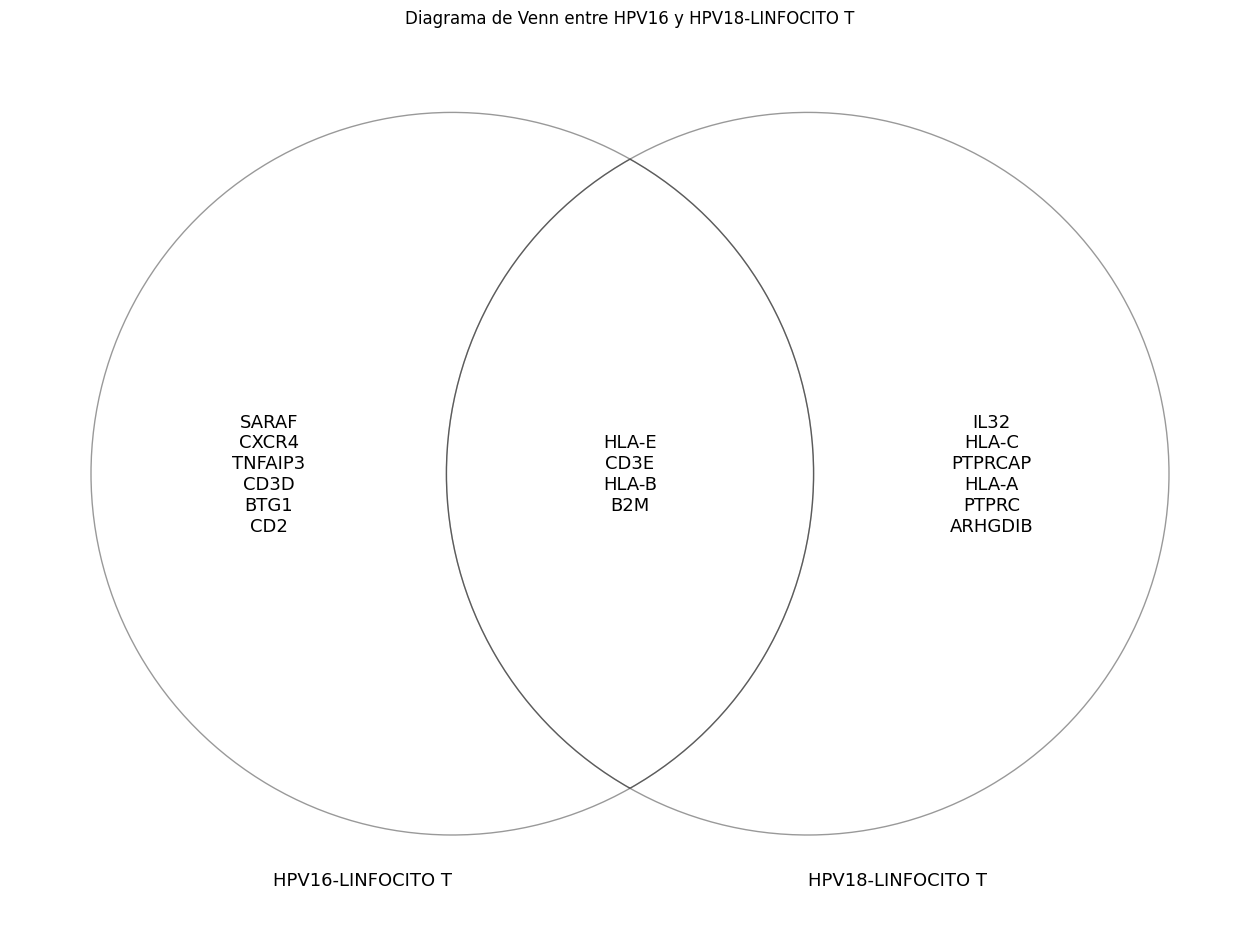

Coincidencias: {'SPARC', 'COL6A2'}
Elementos exclusivos de HPV16-EPITELIO: {'BGN', 'CAVIN1', 'TCF4', 'AEBP1', 'IGFBP7', 'CALD1', 'MGP', 'SERPING1'}
Elementos exclusivos de HPV18-EPITELIO: {'COL1A1', 'COL1A2', 'DCN', 'IGFBP5', 'LUM', 'PCOLCE', 'COL3A1', 'SFRP4'}


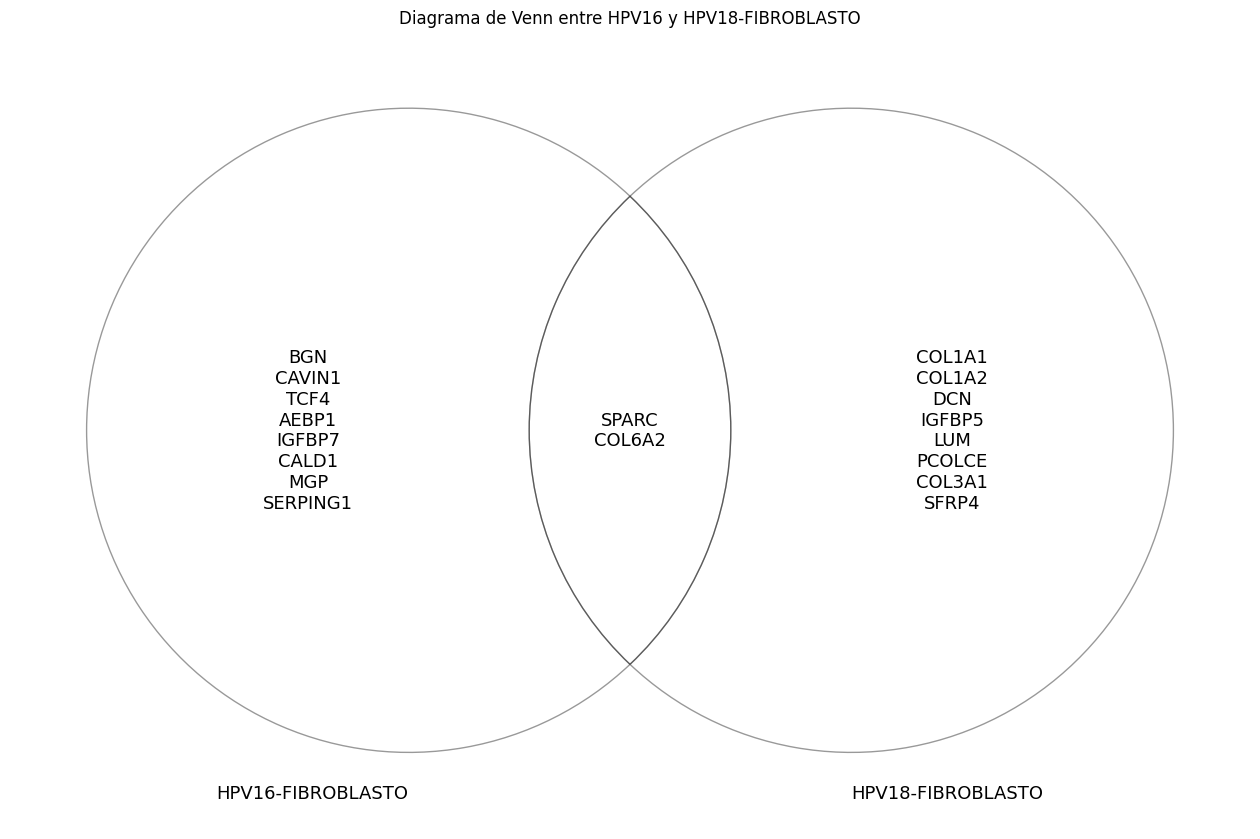

Coincidencias: {'HLA-DRA', 'HLA-DRB1', 'CD74'}
Elementos exclusivos de HPV16-EPITELIO: {'HLA-DMA', 'CD83', 'HLA-DPA1', 'HLA-DRB5', 'HLA-DPB1', 'HLA-DQA1', 'HLA-DQB1'}
Elementos exclusivos de HPV18-EPITELIO: {'TYROBP', 'CTSS', 'FCER1G', 'SRGN', 'FTL', 'LYZ', 'AIF1'}


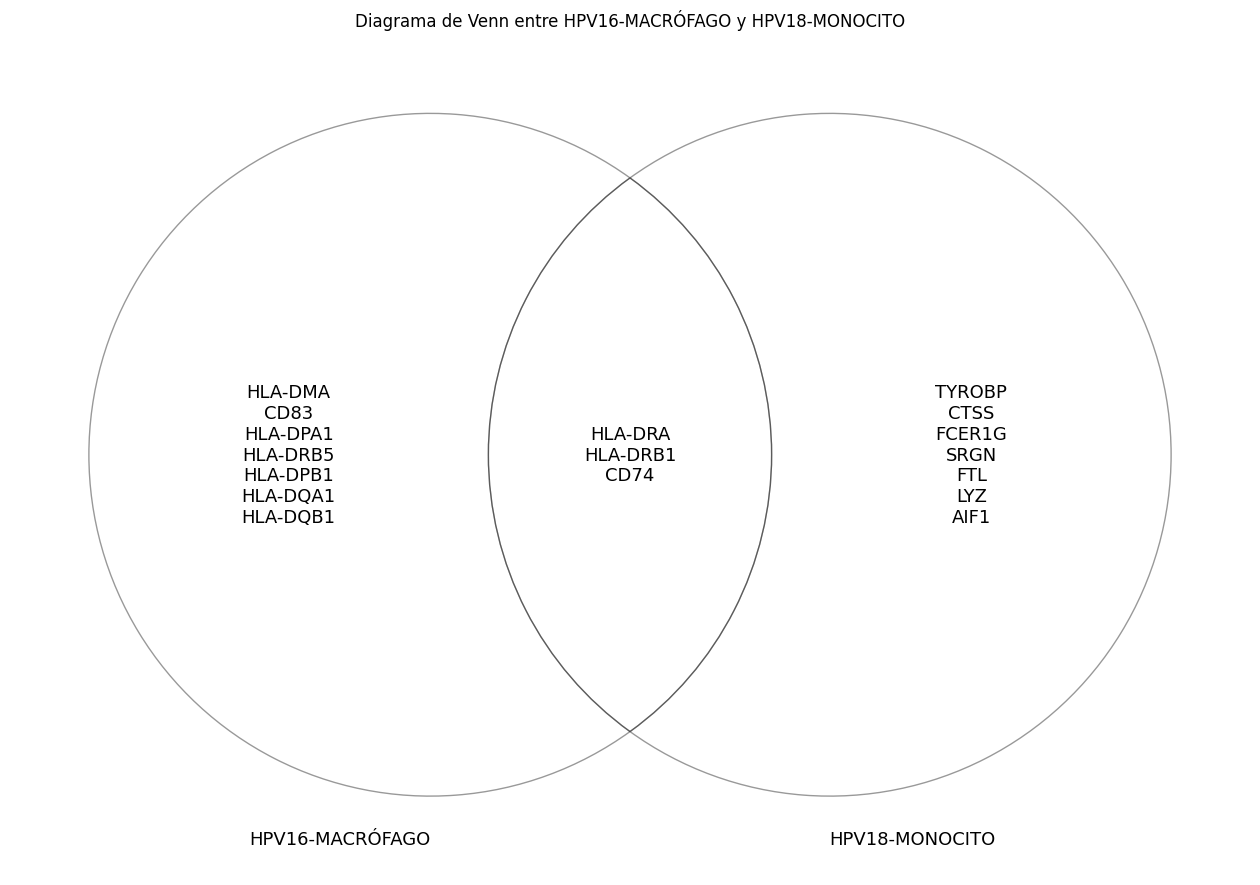

In [3]:
for cluster in clusters:
    # Leer los archivos CSV
    csv1 = pd.read_csv(f"/home/akim/Desktop/TFM/raw/venn/16-{cluster}.csv")
    csv2 = pd.read_csv(f"/home/akim/Desktop/TFM/raw/venn/18-{cluster}.csv")
    
    # Extraer las columnas de interés
    set1 = set(csv1[cluster].dropna())  # Eliminar NaNs si los hay
    set2 = set(csv2[cluster].dropna())  # Eliminar NaNs si los hay
    
    # Encontrar la intersección (coincidencias)
    coincidencias = set1.intersection(set2)
    exclusivos_set1 = set1 - set2  # Elementos exclusivos de set1
    exclusivos_set2 = set2 - set1  # Elementos exclusivos de set2
    
    # Mostrar las coincidencias
    print(f"Coincidencias: {coincidencias}")
    print(f"Elementos exclusivos de HPV16-EPITELIO: {exclusivos_set1}")
    print(f"Elementos exclusivos de HPV18-EPITELIO: {exclusivos_set2}")
    
    # Crear el diagrama de Venn con más espacio
    plt.figure(figsize=(16, 16))  # Aumentamos significativamente el tamaño
    
    # Dibujar el diagrama de Venn sin colores
    if cluster == 'MACROFAGO-MONOCITO':
        venn = venn2([set1, set2], set_labels=(f'HPV16-MACRÓFAGO', f'HPV18-MONOCITO'))
    else: 
        venn = venn2([set1, set2], set_labels=(f'HPV16-{cluster}', f'HPV18-{cluster}'))
    
    # Desactivar los colores y poner bordes negros
    venn.get_patch_by_id('10').set_edgecolor('black')  # Borde negro para el área exclusiva de set1
    venn.get_patch_by_id('01').set_edgecolor('black')  # Borde negro para el área exclusiva de set2
    venn.get_patch_by_id('11').set_edgecolor('black')  # Borde negro para la intersección
    
    # Desactivar el color de los círculos
    venn.get_patch_by_id('10').set_facecolor('none')
    venn.get_patch_by_id('01').set_facecolor('none')
    venn.get_patch_by_id('11').set_facecolor('none')
    
    # Asignar las etiquetas personalizadas
    venn.get_label_by_id('10').set_text('\n'.join(exclusivos_set1))
    venn.get_label_by_id('01').set_text('\n'.join(exclusivos_set2))
    venn.get_label_by_id('11').set_text('\n'.join(coincidencias))   # Coincidencias entre ambos
    
    # Ajustar el tamaño de las etiquetas
    for label in plt.gca().texts:
        label.set_fontsize(13)  # Ajustamos el tamaño de fuente para evitar que el texto se sobrepase
        label.set_wrap(True)    # Permitimos que el texto se envuelva si es necesario
    
    # Título del gráfico
    if cluster == 'MACROFAGO-MONOCITO':
        plt.title(f"Diagrama de Venn entre HPV16-MACRÓFAGO y HPV18-MONOCITO")
    else: 
        plt.title(f"Diagrama de Venn entre HPV16 y HPV18-{cluster}")
    
    plt.show()